<a href="https://colab.research.google.com/github/rj-pal/Percolation/blob/main/Percolation_Tests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Percolation Test Results

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Check GPU connection
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Fri Jun 17 21:15:20 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [5]:
import sys
sys.path.append('drive/MyDrive/modules')

In [6]:
# To meet the requirements of the Percolation Visualization Class- not used here

!pip install colorama

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
from Percolation import *
import matplotlib.pyplot as plt

Test 1: Compares all four algorithms (Quick Find, Quick Union, Weighted Quick Union, and Weighted Quick Union with Path Compression) to look at the run times of 100 iterations from a 4 x 4 network to a 11 x 11 network. 

The test is for percolation and the percolation threshold is shown for each.

In the results below, we can clearly see the advantage of Quick Union over Quick Find when scaling the number of iterations. The performance advantage of the quick union algorithms can be seen first at the network size of 16, where quick find takes more than double the time to percolate. By the last iteration, size of 11, the time is more than 10 times longer.

In [ ]:
for i in range(10):
    size = (i + 2) ** 2
    mc = MonteCarlo(size, 100)
    print(f"Tests for network size: {size}")
    print("__________________________")
    mc.monte_carlo_percolation_test('PathCompression', randomized=False, seed_value=3)
    print()
    mc.monte_carlo_percolation_test('WeightedQuickUnion', randomized=False, seed_value=3)
    print()
    mc.monte_carlo_percolation_test('QuickUnion', randomized=False, seed_value=3)
    print()
    mc.monte_carlo_percolation_test('QuickFind', randomized=False, seed_value=3)
    print()

Tests for network size: 4
__________________________
Percolation Threshold Average: 60.5%
Board Size: 4
Iterations: 100
Algorithm: PathCompression
monte_carlo_percolation_test: Elapsed time of 0.015648841857910156 s

Percolation Threshold Average: 60.5%
Board Size: 4
Iterations: 100
Algorithm: WeightedQuickUnion
monte_carlo_percolation_test: Elapsed time of 0.010016679763793945 s

Percolation Threshold Average: 60.5%
Board Size: 4
Iterations: 100
Algorithm: QuickUnion
monte_carlo_percolation_test: Elapsed time of 0.014173269271850586 s

Percolation Threshold Average: 60.5%
Board Size: 4
Iterations: 100
Algorithm: QuickFind
monte_carlo_percolation_test: Elapsed time of 0.012816905975341797 s

Tests for network size: 9
__________________________
Percolation Threshold Average: 59.5553%
Board Size: 9
Iterations: 100
Algorithm: PathCompression
monte_carlo_percolation_test: Elapsed time of 0.06678271293640137 s

Percolation Threshold Average: 59.5553%
Board Size: 9
Iterations: 100
Algorithm:

Test 2: Compares the Quick Union family to look at the run times of a fixed 100 x 100 network at various iterations: 100, 500, 1000, 2500, 5000.

The test is for full connection of the network and the times are shown.

The results show that the weighted tree algorithms really scale for full connection and perform much faster than the regular quick union algorithm.

In [7]:
pc = 'PathCompression'
wqu = 'WeightedQuickUnion'
qu = 'QuickUnion'
pc_times = []
wqu_times = []
qu_times = []
for i in [100, 500, 1000, 2500, 5000]:
    size = 100
    times = i
    mc = MonteCarlo(size, i)
    print(f"Size {size} x {size} at {i} iterations")
    print("---------------------------------------")
    print(f"Algorithm: {pc}")
    pc_times.append(mc.monte_carlo_full_connection_test(pc, seed_value=3, show_results=False)[1])
    print()
    print(f"Algorithm: {wqu}")
    wqu_times.append(mc.monte_carlo_full_connection_test(wqu, seed_value=3, show_results=False)[1])
    print()
    print(f"Algorithm: {qu}")
    qu_times.append(mc.monte_carlo_full_connection_test(qu, seed_value=3, show_results=False)[1])
    print()

Size 100 x 100 at 100 iterations
---------------------------------------
Algorithm: PathCompression
monte_carlo_full_connection_test: Elapsed time of 8.336841344833374 s

Algorithm: WeightedQuickUnion
monte_carlo_full_connection_test: Elapsed time of 7.788947820663452 s

Algorithm: QuickUnion
monte_carlo_full_connection_test: Elapsed time of 28.62847375869751 s

Size 100 x 100 at 500 iterations
---------------------------------------
Algorithm: PathCompression
monte_carlo_full_connection_test: Elapsed time of 32.259581327438354 s

Algorithm: WeightedQuickUnion
monte_carlo_full_connection_test: Elapsed time of 30.18432092666626 s

Algorithm: QuickUnion
monte_carlo_full_connection_test: Elapsed time of 143.35964441299438 s

Size 100 x 100 at 1000 iterations
---------------------------------------
Algorithm: PathCompression
monte_carlo_full_connection_test: Elapsed time of 63.66401672363281 s

Algorithm: WeightedQuickUnion
monte_carlo_full_connection_test: Elapsed time of 60.3635618686676

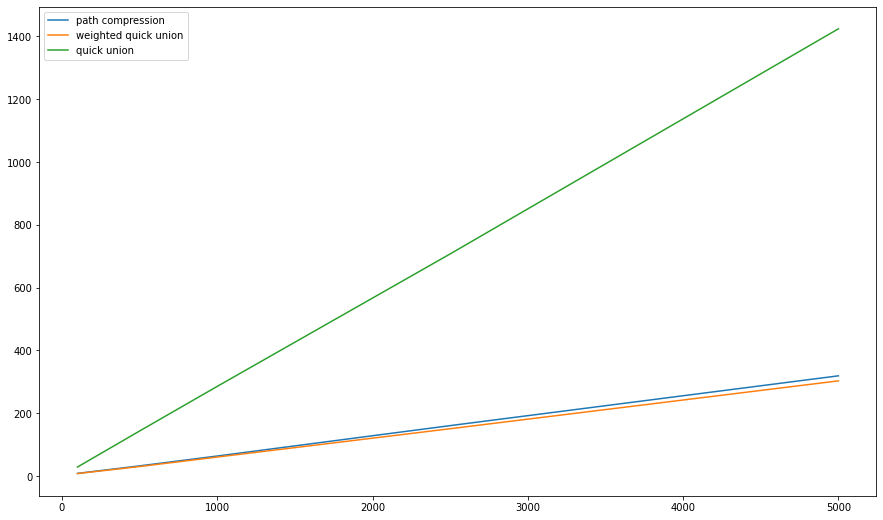

In [9]:
x = [100, 500, 1000, 2500, 5000]
y1 = pc_times
y2 = wqu_times
y3 = qu_times
plt.figure(figsize=(15, 9)) 
plt.plot(x, y1, label = "path compression")
plt.plot(x, y2, label = "weighted quick union")
plt.plot(x, y3, label = "quick union")
plt.legend()
plt.show()

In [11]:
pc = 'PathCompression'
wqu = 'WeightedQuickUnion'
pc_times = []
wqu_times = []
for size in range(500, 5001, 500):
    mc = MonteCarlo(size, 1)
    print(f"Size {size} x {size} at one iteration")
    print("---------------------------------------")
    print(f"Algorithm: {pc}")
    pc_times.append(mc.monte_carlo_full_connection_test(pc, seed_value=3, show_results=False)[1])
    print()
    print(f"Algorithm: {wqu}")
    wqu_times.append(mc.monte_carlo_full_connection_test(wqu, seed_value=3, show_results=False)[1])
    print()

Size 500 x 500 at one iteration
---------------------------------------
Algorithm: PathCompression
monte_carlo_full_connection_test: Elapsed time of 1.9867360591888428 s

Algorithm: WeightedQuickUnion
monte_carlo_full_connection_test: Elapsed time of 1.9474401473999023 s

Size 1000 x 1000 at one iteration
---------------------------------------
Algorithm: PathCompression
monte_carlo_full_connection_test: Elapsed time of 8.148958206176758 s

Algorithm: WeightedQuickUnion
monte_carlo_full_connection_test: Elapsed time of 7.720038175582886 s

Size 1500 x 1500 at one iteration
---------------------------------------
Algorithm: PathCompression
monte_carlo_full_connection_test: Elapsed time of 20.476616144180298 s

Algorithm: WeightedQuickUnion
monte_carlo_full_connection_test: Elapsed time of 19.10306143760681 s

Size 2000 x 2000 at one iteration
---------------------------------------
Algorithm: PathCompression
monte_carlo_full_connection_test: Elapsed time of 34.97930645942688 s

Algorith

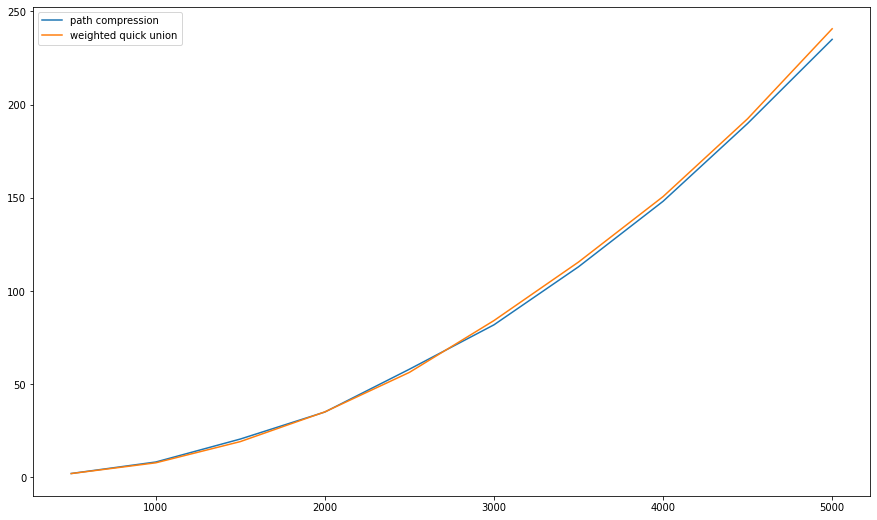

In [12]:
x = [x for x in range(500, 5001, 500)]
y1 = pc_times
y2 = wqu_times
plt.figure(figsize=(15, 9)) 
plt.plot(x, y1, label = "path compression")
plt.plot(x, y2, label = "weighted quick union")
plt.legend()

plt.show()